<a href="https://colab.research.google.com/github/ankit-rathi/AR-Talks/blob/master/Nifty50_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/ankit-rathi/Data-Science-with-Python/master/Stock_Analysis/data/MMI_2021-11-11.csv')

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)
data = data.sort_index()
data.head()

,Market Mood Index,Nifty Index
Date,,
2012-03-12,60.443328,5359.55
2012-03-13,64.145980,5429.50
2012-03-14,64.825216,5463.90
2012-03-15,52.371887,5380.50
2012-03-16,43.219621,5317.90


In [2]:
data.columns = ['MMI','Nifty50']

In [3]:
data[(data['MMI'] < 30) | (data['MMI'] > 70)].head(30)

,MMI,Nifty50
Date,,
2012-03-26,28.730953,5184.25
2012-03-27,20.077523,5243.15
2012-03-28,20.482989,5194.75
2012-03-29,18.276649,5178.85
2012-04-26,29.705296,5189.00
2012-05-09,25.831536,4974.80
2012-05-10,24.744581,4965.70
2012-05-11,28.566672,4928.90
2012-05-14,29.854199,4907.80


In [4]:
data['Flag'] = 'Na'
data.loc[data['MMI'] < 30, 'Flag'] = 'Buy'
data.loc[data['MMI'] > 70, 'Flag'] = 'Sell'

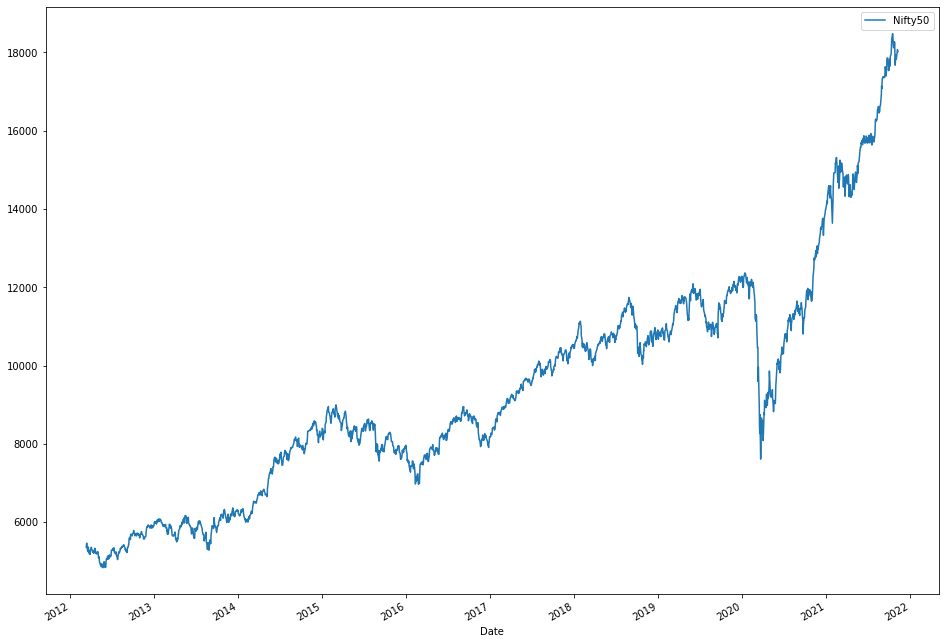

In [5]:
data.plot.line(y=['Nifty50'], figsize=(16,12))

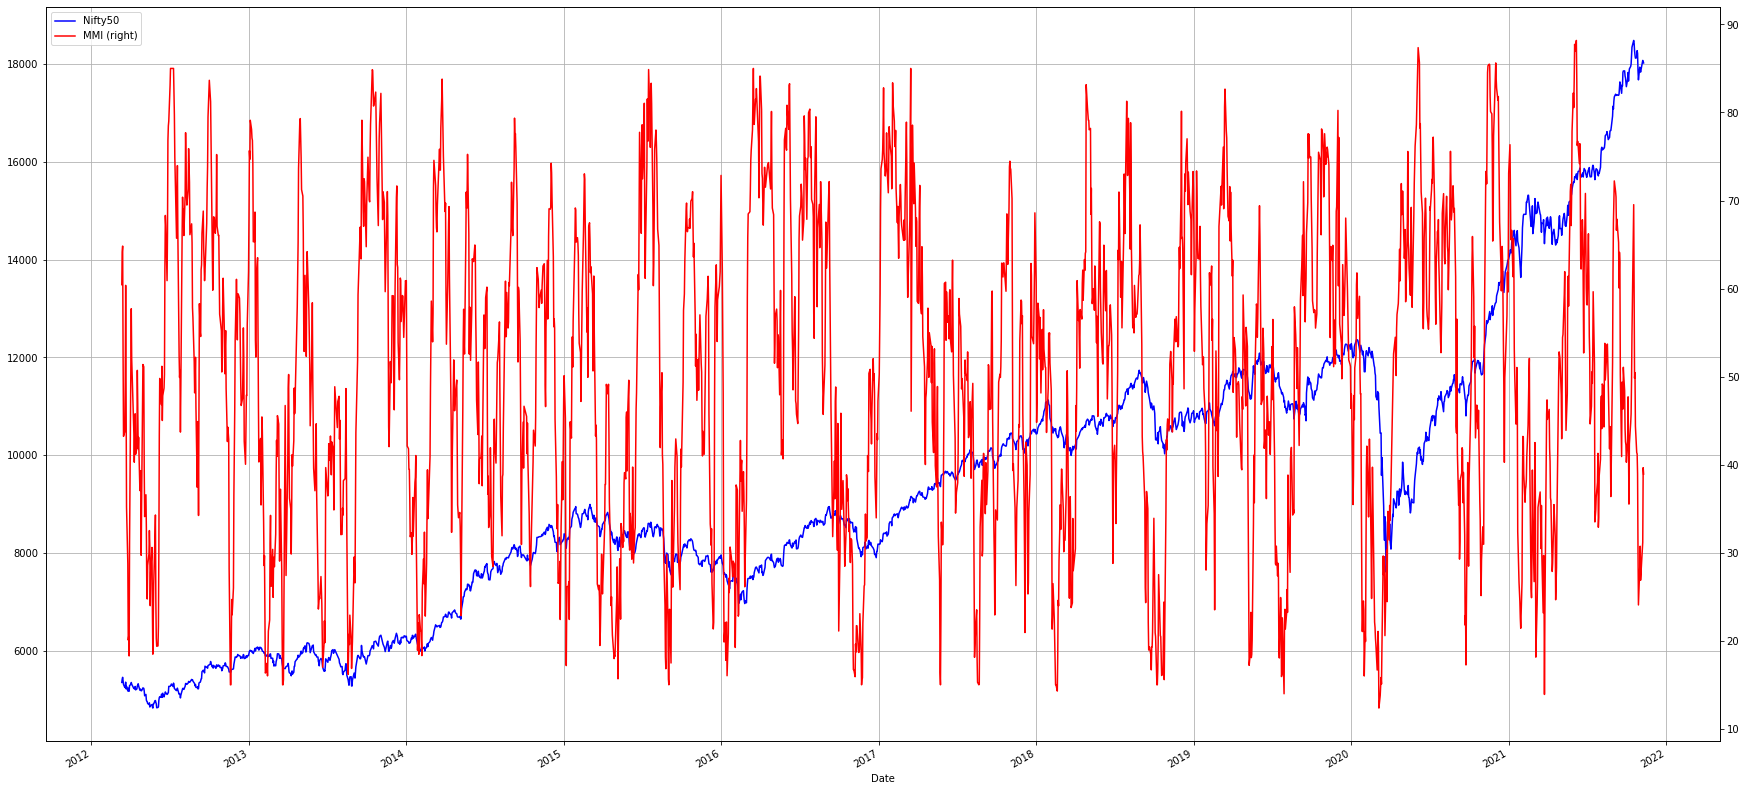

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
plt.xlabel('MMI Vs Nifty50')

ax1 = data.Nifty50.plot(color='blue', grid=True, label='Nifty50')
ax2 = data.MMI.plot(color='red', grid=True, secondary_y=True, label='MMI')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

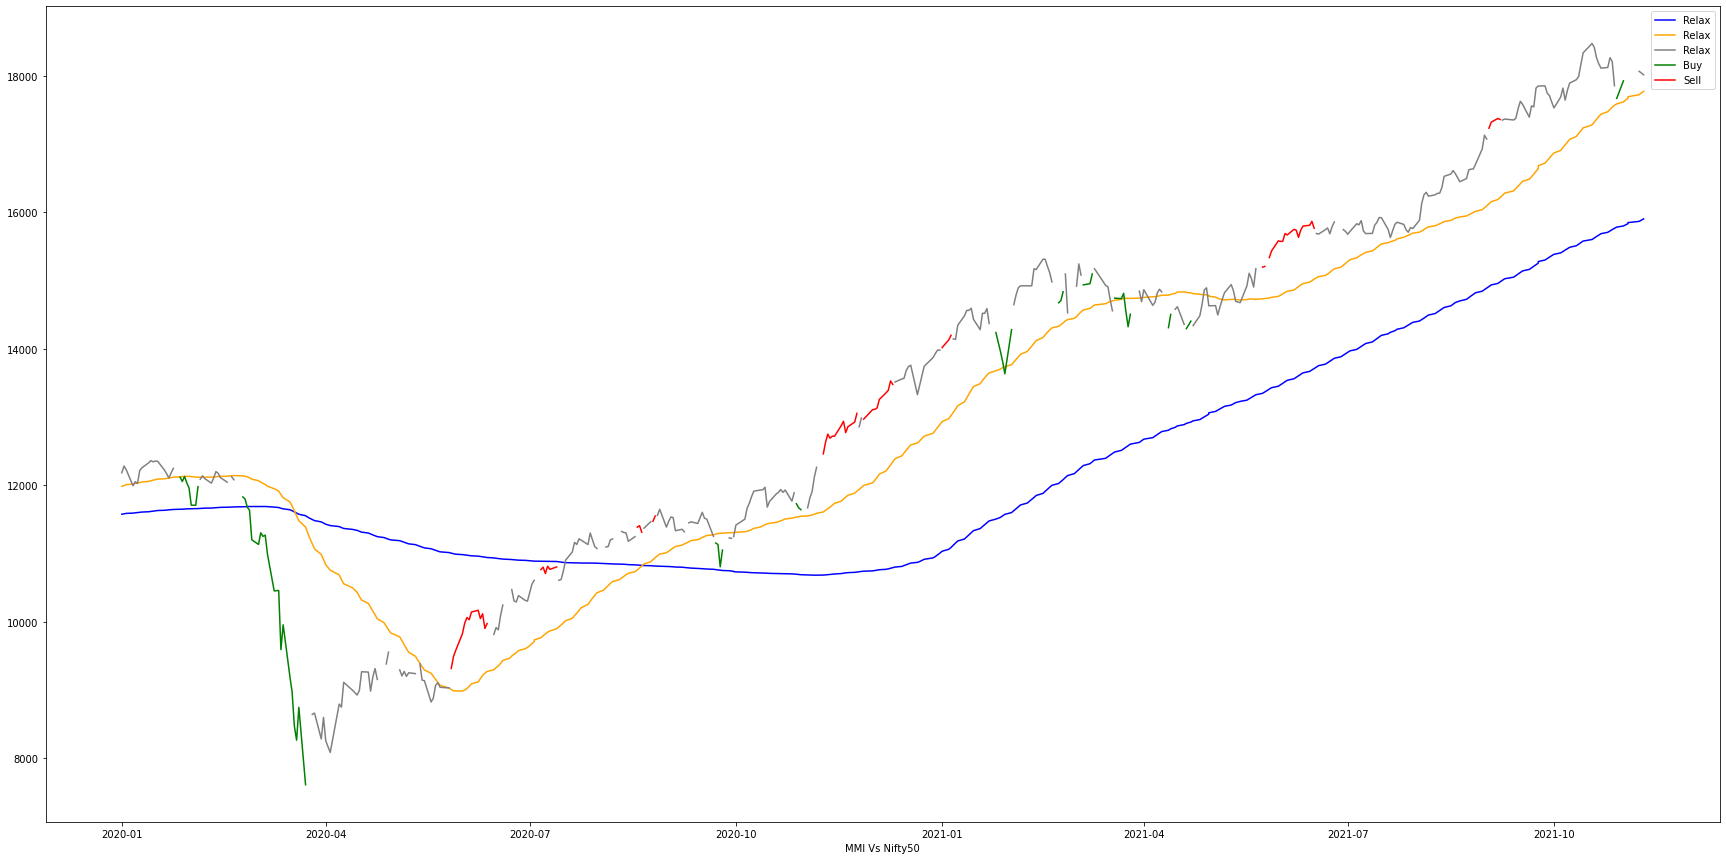

In [13]:
data['200 DMA'] = data['Nifty50'].rolling(window = 200, min_periods = 1).mean()
data['50 DMA'] = data['Nifty50'].rolling(window = 50, min_periods = 1).mean()
df = data[data.index >= '2020-01-01']

import numpy as np
plt.figure(figsize=(30,15))
plt.xlabel('MMI Vs Nifty50')
plt.plot(df["200 DMA"], color="blue", label="Relax")
plt.plot(df["50 DMA"], color="orange", label="Relax")
plt.plot(df.index, np.where(df["Flag"]=='Na', df["Nifty50"], None), color="grey", label="Relax")
plt.plot(df.index, np.where(df["Flag"]=='Buy', df["Nifty50"], None), color="green", label="Buy")
plt.plot(df.index, np.where(df["Flag"]=='Sell', df["Nifty50"], None), color="red", label="Sell")
plt.legend()

In [16]:
!pip install yfinance
#!pip install talib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
yfin.pdr_override()

stock_symbol = '^NSEI'
start_date = (datetime.date.today() + datetime.timedelta(days=-365*10)).strftime('%Y-%m-%d')
#end_date = '2020-01-01'
end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')

# import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
start = datetime.datetime(*map(int, start_date.split('-')))
end = datetime.datetime(*map(int, end_date.split('-'))) 
stock_df = web.DataReader(stock_symbol,  data_source='yahoo', start = start, end = end)[['Close','Volume']]
stock_df

[*********************100%***********************]  1 of 1 completed


,Close,Volume
Date,,
2012-12-13,5851.500000,0
2012-12-14,5879.600098,0
2012-12-17,5857.899902,0
2012-12-18,5896.799805,0
2012-12-19,5929.600098,0
...,...,...
2022-12-05,18701.050781,288400
2022-12-06,18642.750000,217800
2022-12-07,18560.500000,200500


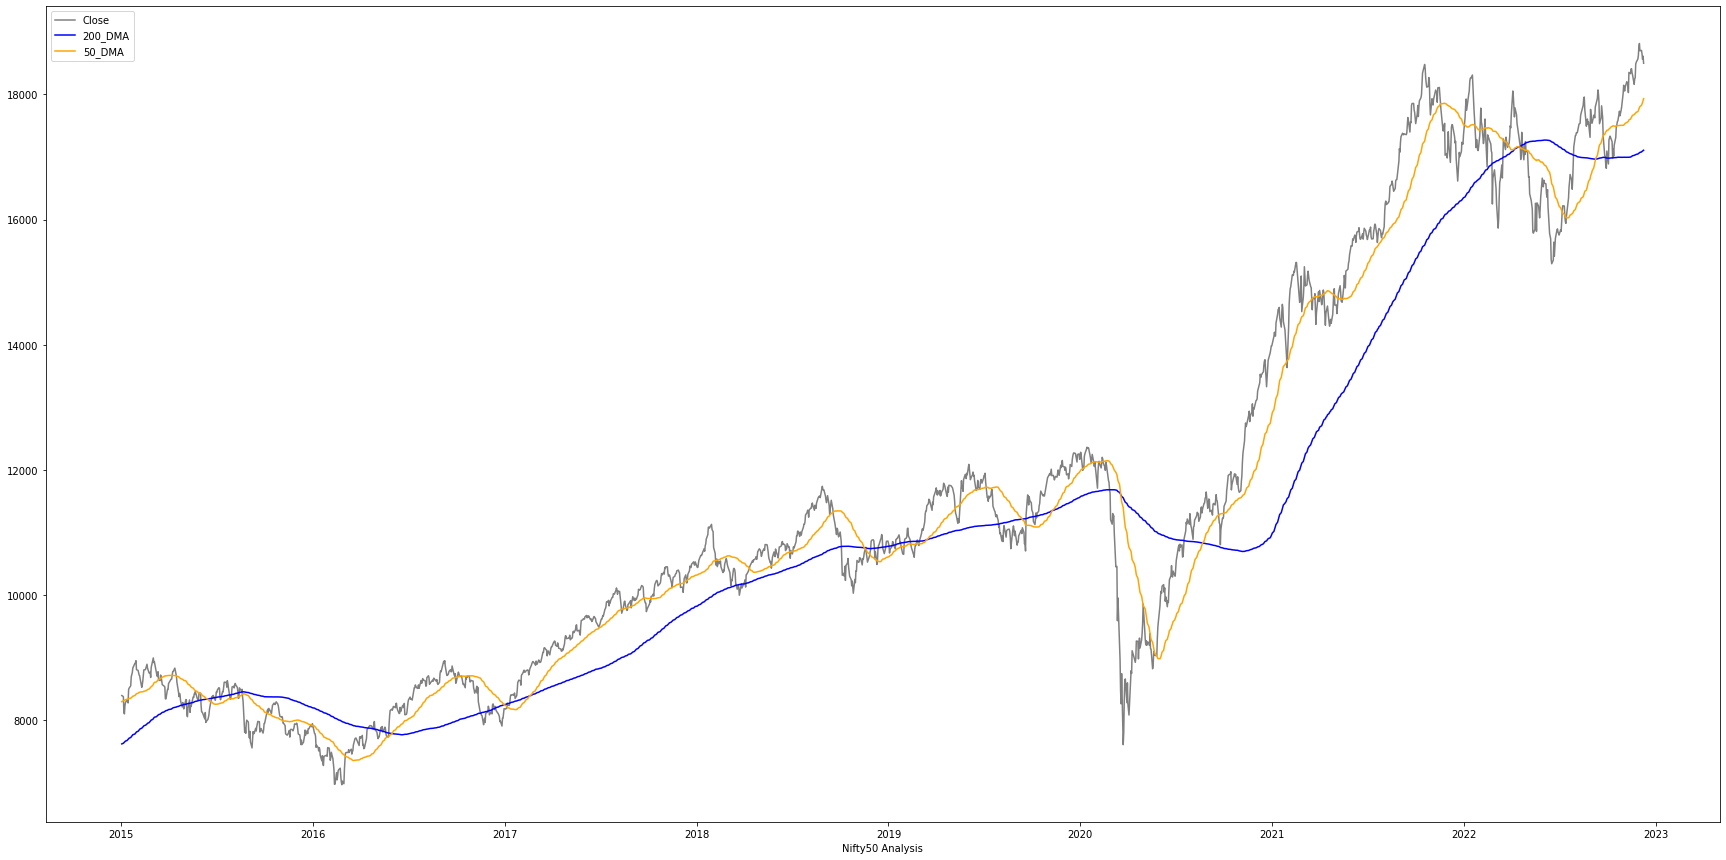

In [40]:
stock_df['200_DMA'] = stock_df['Close'].rolling(window = 200, min_periods = 1).mean()
stock_df['50_DMA'] = stock_df['Close'].rolling(window = 50, min_periods = 1).mean()
stock_df['Dev%_200'] = round((stock_df['Close'] - stock_df['200_DMA'])*100/stock_df['200_DMA'],2)
df = stock_df[stock_df.index >= '2015-01-01']

import numpy as np
plt.figure(figsize=(30,15))
plt.xlabel('Nifty50 Analysis')
plt.plot(df["Close"], color="grey", label="Close")
plt.plot(df["200_DMA"], color="blue", label="200_DMA")
plt.plot(df["50_DMA"], color="orange", label="50_DMA")
plt.legend()

In [52]:
stock_df[stock_df['Dev%_200'] > 0]['Dev%_200'].mean()

8.017029265599117

In [54]:
stock_df[stock_df['Dev%_200'] > 8].tail(30)

,Close,Volume,200_DMA,50_DMA,Dev%_200
Date,,,,,
2021-11-25,17536.250000,255900,16069.718735,17858.951992,9.13
2021-12-08,17469.750000,257800,16163.692720,17780.786953,8.08
2021-12-09,17516.849609,237200,16174.709717,17774.021953,8.30
2021-12-10,17511.300781,204500,16186.221719,17769.275977,8.19
2022-01-04,17805.250000,247400,16375.518706,17499.012891,8.73
2022-01-05,17925.250000,251500,16390.592705,17495.009883,9.36
2022-01-06,17745.900391,236500,16405.715708,17484.559883,8.17
2022-01-07,17812.699219,239300,16421.989956,17476.594883,8.47
2022-01-10,18003.300781,232400,16438.286460,17479.515898,9.52


In [55]:
stock_df['Flag'] = 'Na'
stock_df.loc[stock_df['Dev%_200'] < -5, 'Flag'] = 'Buy'
stock_df.loc[stock_df['Dev%_200'] > 8, 'Flag'] = 'Sell'

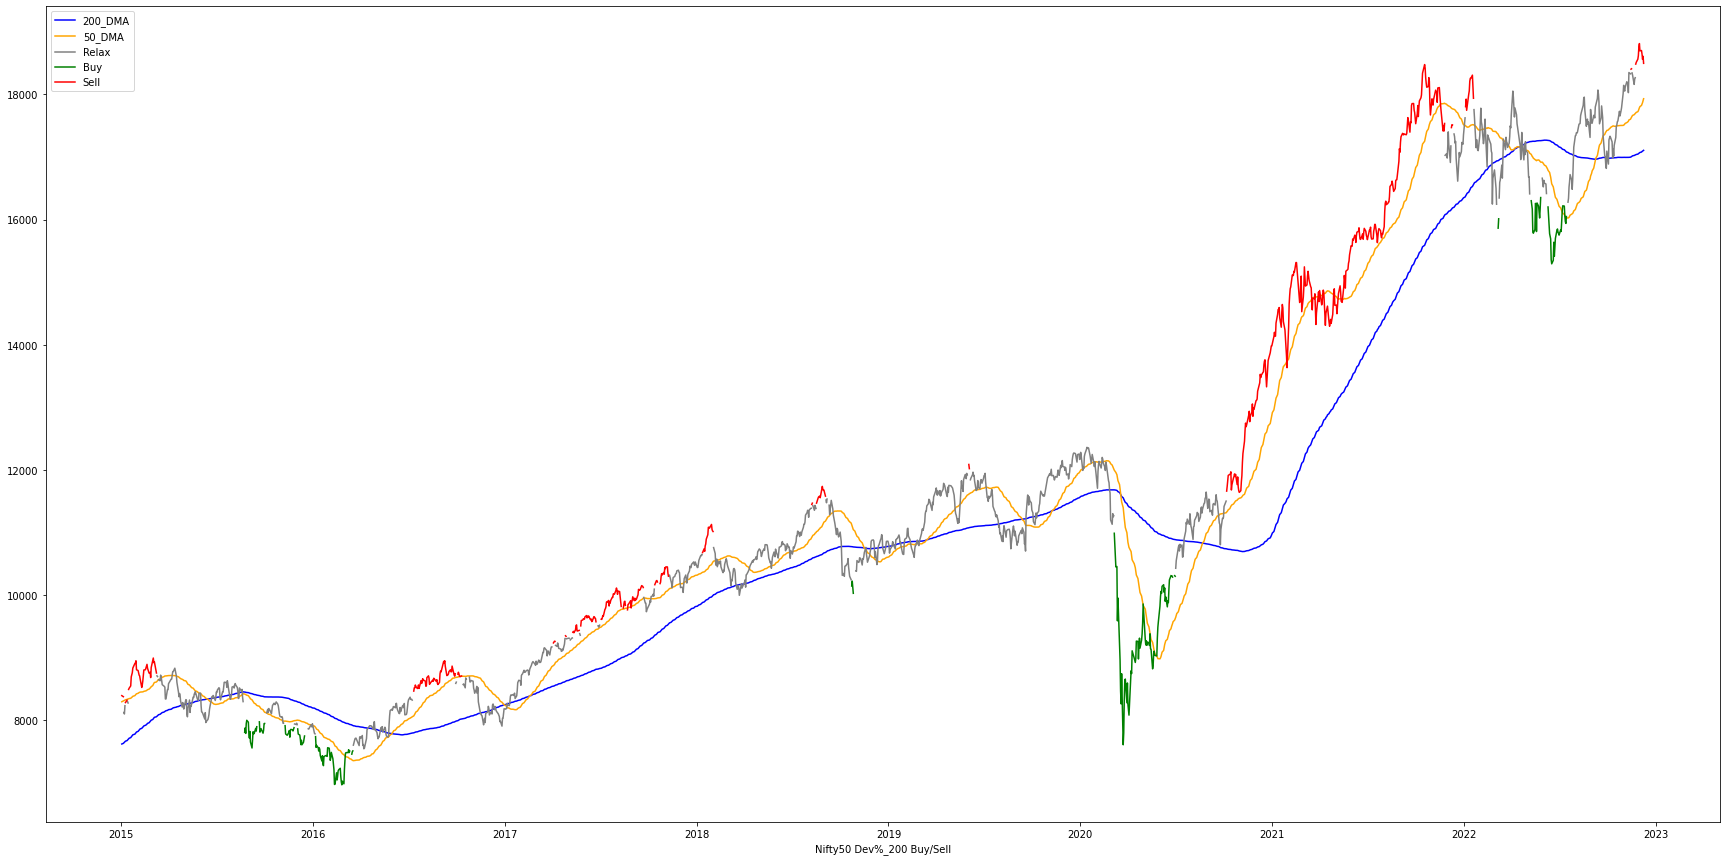

In [57]:
df = stock_df[stock_df.index >= '2015-01-01']

import numpy as np
plt.figure(figsize=(30,15))
plt.xlabel('Nifty50 Dev%_200 Buy/Sell')
plt.plot(df["200_DMA"], color="blue", label="200_DMA")
plt.plot(df["50_DMA"], color="orange", label="50_DMA")
plt.plot(df.index, np.where(df["Flag"]=='Na', df["Close"], None), color="grey", label="Relax")
plt.plot(df.index, np.where(df["Flag"]=='Buy', df["Close"], None), color="green", label="Buy")
plt.plot(df.index, np.where(df["Flag"]=='Sell', df["Close"], None), color="red", label="Sell")
plt.legend()